<a href="https://colab.research.google.com/github/yishairasowsky/Sefaria-Project/blob/master/ML/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
 


In [0]:
 
single_class_stem_df = pd.read_pickle('/content/drive/My Drive/Colab Datasets/single_class_stem_df.pkl')
single_class_stem_df.head()
df = single_class_stem_df

In [59]:

topics_df = pd.read_pickle('/content/drive/My Drive/Colab Datasets/single_class_topics_df.pkl')
topics_df.head()

,En,aaron,aarons-death,aarons-sin,abandoned-corpses,abaye,abel,abigail,abijah-of-judah,abimelech-and-sarah,abimelech-the-son-of-jerubaal,abner,abraham,abraham-and-abimelech,abraham-and-hagar,abraham-and-his-environment,abraham-and-lot,abraham-and-sarah,abraham-and-sodom,abraham-and-the-angels,abraham-and-the-hittites,abraham-and-the-kings,abraham-in-ur-kasdim-and-his-departure-from-there,abrahams-observance-of-the-torah-and-the-commandments,acceptance-of-nazarite-vows-and-its-duration,achashteranim,acquisitions,acts-of-god,actuality,adams-sin-and-his-punishment,additional-gifts-to-the-priesthood,adjacently-after,adonijah,adornments,afflictions,agency,ahab,ahasuerus,ahaz,ahaziah-(judah),...,witnesses,wives-of-priests,women,wonders,wondrous,wood-for-the-sacrifices,wool,work-(×××××),workers,worries,wrapping,writing,writing-a-torah-scroll,yair,years,yefat-toar,yehonatan-ben-gershom,yehoram-(king-of-israel),yehoyada,yehu,yerovam-(son-of-jehoash),yerovam-(son-of-nebat),yesh-em-lemikra,yetzer-hara,yetzer-hatov,yirat-shamayim,yishmael-ben-netanyah,yitro,yoktan,yom-kippur,yom-kippur-offerings,yom-tov,young-men-(× ×¢×¨),young-torah-scholars,young-women,zav,zavah,zedekiah,zekhariyah-ben-yehoyada,zipporah
0,mishna teach blemish develop within first year...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,see clear side afraid afraid person strength a...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,modifi mean board refer uniqu name modifi even...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,gemara rais issu clarifi tanna heard said seme...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,lord high place arnon author quot samuel ii un...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
topics_list = list(topics_df.columns)[1:]
hits = {topic:topics_df[topic].sum() for topic in topics_list}

from collections import Counter
counter = Counter(hits)
top_ten = counter.most_common(10)
for topic, num in top_ten:
     print(f'{topic}: {num}')

laws-of-transferring-between-domains: 128
rabbinically-forbidden-activities-on-shabbat: 119
dinei-yibum: 118
laws-of-the-prohibitions-of-eating-meat: 101
laws-of-holidays: 96
financial-ramifications-of-marriage: 85
laws-of-animal-sacrifices: 84
laws-of-the-impurity-and-prohibition-of-a-menstruant-woman: 84
hilchot-kiddushin: 75
dinei-haget: 66


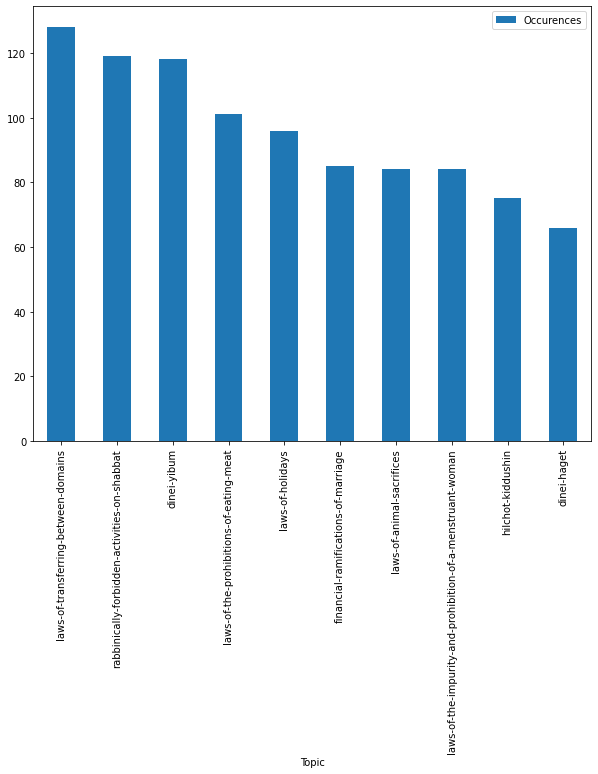

In [61]:
import matplotlib as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8

df = pd.DataFrame(top_ten, columns=['Topic','Occurences'])
df.plot(kind='bar', x='Topic')

In [62]:
# topics_df.columns[:10]
top_ten_list = [item[0] for item in top_ten]
top_ten_list

['laws-of-transferring-between-domains',
 'rabbinically-forbidden-activities-on-shabbat',
 'dinei-yibum',
 'laws-of-the-prohibitions-of-eating-meat',
 'laws-of-holidays',
 'financial-ramifications-of-marriage',
 'laws-of-animal-sacrifices',
 'laws-of-the-impurity-and-prohibition-of-a-menstruant-woman',
 'hilchot-kiddushin',
 'dinei-haget']

In [63]:
# top_ten_topics_df = topics_df[['En'] + top_ten_list]
top_ten_topics_df = topics_df[['En'] + top_ten_list]
top_ten_topics_df.head()

,En,laws-of-transferring-between-domains,rabbinically-forbidden-activities-on-shabbat,dinei-yibum,laws-of-the-prohibitions-of-eating-meat,laws-of-holidays,financial-ramifications-of-marriage,laws-of-animal-sacrifices,laws-of-the-impurity-and-prohibition-of-a-menstruant-woman,hilchot-kiddushin,dinei-haget
0,mishna teach blemish develop within first year...,0,0,0,0,0,0,0,0,0,0
1,see clear side afraid afraid person strength a...,0,0,0,0,0,0,0,0,0,0
3,modifi mean board refer uniqu name modifi even...,0,0,0,0,0,0,0,0,0,1
8,gemara rais issu clarifi tanna heard said seme...,0,0,0,0,0,0,0,0,0,0
10,lord high place arnon author quot samuel ii un...,0,0,0,0,0,0,0,0,0,0


In [0]:
top_ten_topics_df.to_pickle('/content/drive/My Drive/Colab Datasets/top_ten_topics_df.pkl')

In [65]:
top_ten_labels_df = topics_df[top_ten_list]
top_ten_labels_df.head()

,laws-of-transferring-between-domains,rabbinically-forbidden-activities-on-shabbat,dinei-yibum,laws-of-the-prohibitions-of-eating-meat,laws-of-holidays,financial-ramifications-of-marriage,laws-of-animal-sacrifices,laws-of-the-impurity-and-prohibition-of-a-menstruant-woman,hilchot-kiddushin,dinei-haget
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0


In [0]:
top_ten_labels_df.to_pickle('/content/drive/My Drive/Colab Datasets/top_ten_labels_df.pkl')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


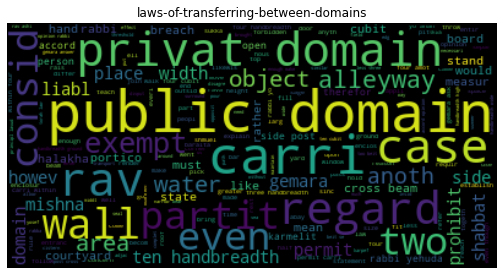

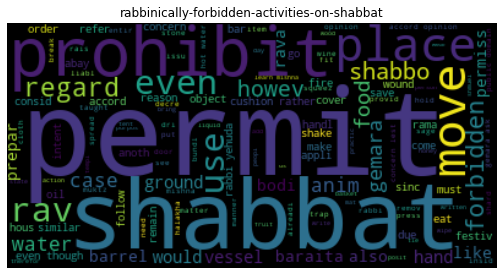

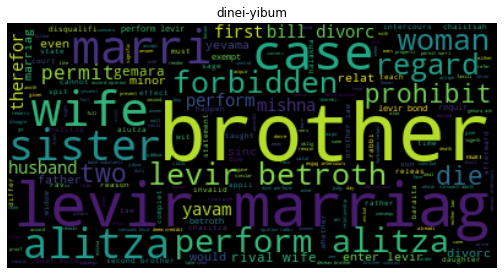

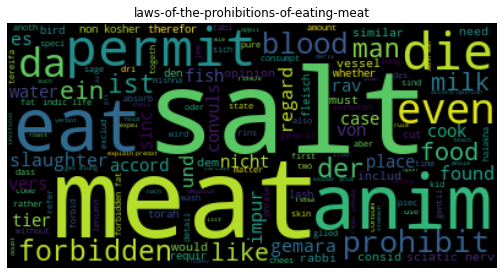

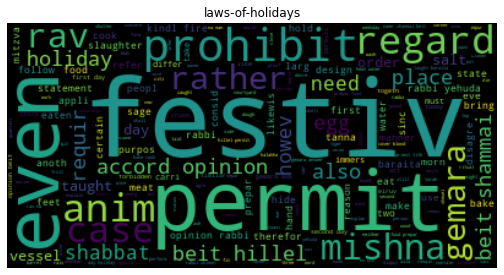

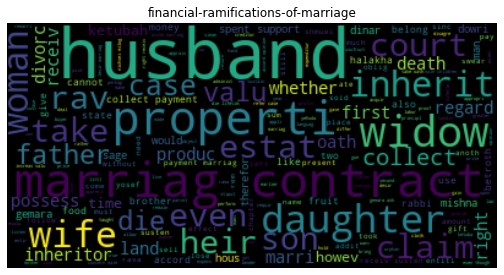

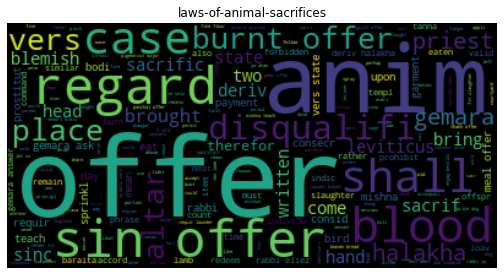

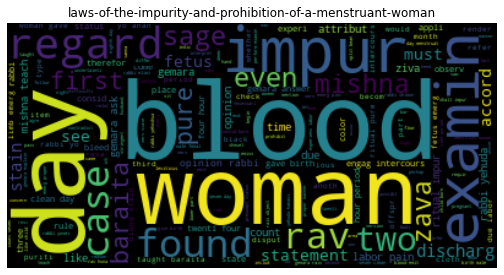

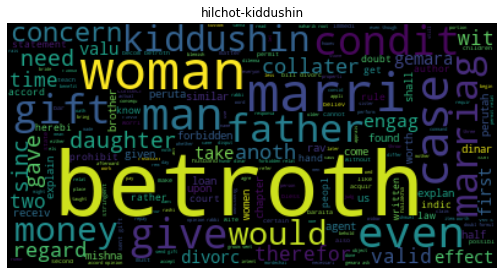

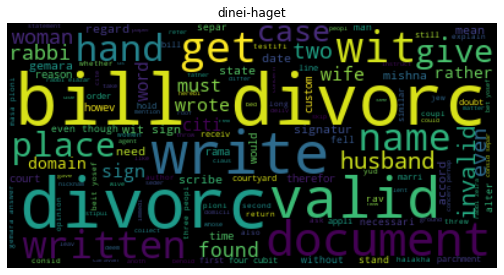

In [67]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')


stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['one','say','said','may']
stopwords.extend(newStopWords)

for index, topic in enumerate(top_ten_list[:]):

    words = ' '.join(list(topics_df[topics_df[topic] == 1]['En']))
    wc = WordCloud(stopwords=stopwords).generate(words)
    
    plt.figure(
        figsize = (8, 8), 
        facecolor = 'w')
    plt.imshow(wc, interpolation="bilinear")
    plt.tight_layout(pad = 3)
    plt.axis("off")
    plt.title(topic)

plt.show()

In [0]:
# df = top_ten_topics_df[pd.notnull(top_ten_topics_df['En'])]
# df = top_ten_topics_df[pd.notnull(top_ten_topics_df['En'])]

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 22055
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   En      8196 non-null   object
 1   Topics  8196 non-null   object
dtypes: object(2)
memory usage: 192.1+ KB


In [0]:
col = ['En', 'Topics']
df = df[col]

In [75]:
df.columns

Index(['En', 'Topics'], dtype='object')

In [0]:
df.columns = ['En', 'Topics']

In [0]:
df['category_id'] = df['Topics'].factorize()[0]
from io import StringIO
category_id_df = df[['Topics', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Topics']].values)

In [85]:
top_ten_list

['laws-of-transferring-between-domains',
 'rabbinically-forbidden-activities-on-shabbat',
 'dinei-yibum',
 'laws-of-the-prohibitions-of-eating-meat',
 'laws-of-holidays',
 'financial-ramifications-of-marriage',
 'laws-of-animal-sacrifices',
 'laws-of-the-impurity-and-prohibition-of-a-menstruant-woman',
 'hilchot-kiddushin',
 'dinei-haget']

In [88]:
# df = df.loc[df['Topics'].to_string in top_ten_list]
df = df[df.Topics.isin(top_ten_list)]

# df = df.loc[df['Topics'].isin()]
df.head()

,En,Topics
3,modifi mean board refer uniqu name modifi even...,dinei-haget
11,hand katafr explan hand slant obvious readi re...,dinei-haget
67,similar two basket untith fruit front first da...,laws-of-holidays
118,mishna state one ate food prepar festiv eiruv ...,laws-of-holidays
131,one may mix water salt oil dip one bread put c...,rabbinically-forbidden-activities-on-shabbat


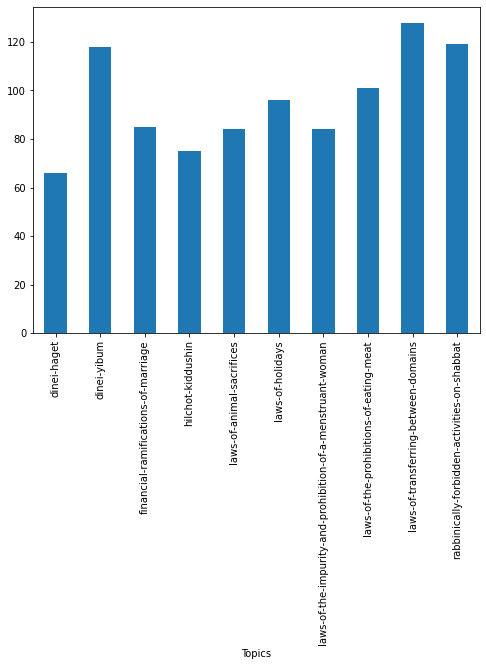

In [89]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))

# df.groupby(['Topic','category_id']).agg(lambda x:x.value_counts().index[0:3])

df.groupby('Topics').En.count().plot.bar(ylim=0)
plt.show()

In [0]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()
labels = df.category_id
features.shape

In [0]:
from sklearn.svm import LinearSVC
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', 
                        encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(single_class_stem_df.En).toarray()
# labels = top_ten_topics_df.category_id
labels = single_class_stem_df.Topics
features.shape

In [0]:
# from sklearn.feature_selection import chi2
# import numpy as np
# N = 2
# category_to_id = {topic:index for index,topic in enumerate(top_ten_list)}

# for topic, category_id in sorted(category_to_id.items()):
  
#   features_chi2 = chi2(features, labels == category_id)
#   indices = np.argsort(features_chi2[0])

#   feature_names = np.array(tfidf.get_feature_names())[indices]
#   unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
#   bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  
#   print("# '{}':".format(Product))
#   print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
#   print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

# X_train, X_test, y_train, y_test = train_test_split(top_ten_topics_df['En'], top_ten_labels_df, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(single_class_stem_df['En'], single_class_stem_df['Topics'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [0]:
# import seaborn as sns

# categories = list(top_ten_labels_df.columns.values)
# sns.set(font_scale = 2)
# plt.figure(figsize=(15,8))
# # ax= sns.barplot(categories, top_ten_labels_df.iloc[1:,1:].sum().values)
# plt.title("Comments in each category", fontsize=24)
# plt.ylabel('Number of comments', fontsize=18)
# plt.xlabel('Comment Type ', fontsize=18)
# #adding the text labels
# rects = ax.patches
# labels = top_ten_labels_df.iloc[:,2:].sum().values
# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
# plt.show()

In [0]:
print(clf.predict(count_vect.transform(["""
A woman ca get married in one of three ways.Two stages are kiddushin and chuppah. 
"""])))


In [0]:
# using binary relevance
!pip install scikit-multilearn
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
# classifier = BinaryRelevance(GaussianNB())
classifier = MultinomialNB()
# train
classifier.fit(X_train, y_train)
# predict
predictions = classifier.predict(X_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()
